In [0]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist2 = input_data.read_data_sets('./mnist/data/', one_hot = True)

In [11]:
print(type(mnist2.train))
print(type(mnist2.train.images), type(mnist2.test.images))
print(type(mnist2.train.labels), type(mnist2.test.labels))

<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [0]:
X_train, y_train, X_test, y_test = mnist2.train.images, mnist2.train.labels, mnist2.test.images, mnist2.test.labels

In [51]:
print(mnist2.train.images.shape, mnist2.train.labels.shape)
print(mnist2.validation.images.shape, mnist2.validation.labels.shape)
print(mnist2.test.images.shape, mnist2.test.labels.shape)

(55000, 784) (55000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [0]:
from keras.datasets import mnist

In [53]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [0]:
import matplotlib.pyplot as plt

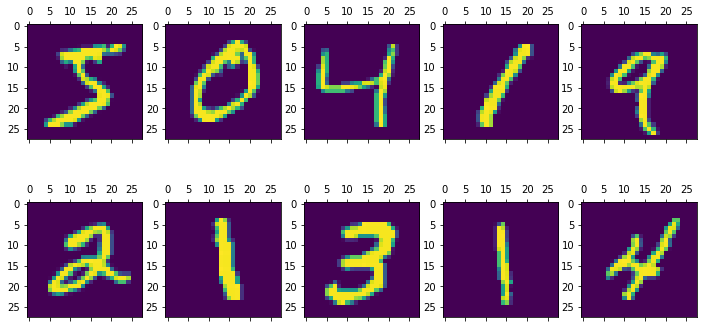

In [75]:
## 2-1 
f, ax = plt.subplots(2, 5, figsize = (12, 6))
for i in range(2):
  for j in range(5):
    ax[i][j].matshow(X_train[(i * 5) + j])

In [77]:
### 데이터 변환하기
X_train = X_train.reshape(60000, 28 * 28)
print(X_train.shape)

(60000, 784)


In [79]:
X_test = X_test.reshape(10000, 28 * 28)
print(X_test.shape)

(10000, 784)


In [81]:
import numpy as np
print(y_train.shape)
y_train_hot = np.eye(10)[y_train]
print(y_train_hot.shape)

print(y_test.shape)
y_test_hot = np.eye(10)[y_test]
print(y_test_hot.shape)

(60000,)
(60000, 10)
(10000,)
(10000, 10)


In [0]:
import os, warnings
warnings.filterwarnings(action = 'ignore')

In [94]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [95]:
print(mnist.test.num_examples, mnist.train.num_examples, mnist.validation.num_examples)
print(mnist.train.labels.shape, mnist.train.images.shape)
print(mnist.test.labels.shape, mnist.test.images.shape)
print(mnist.validation.labels.shape, mnist.validation.images.shape)

10000 55000 5000
(55000, 10) (55000, 784)
(10000, 10) (10000, 784)
(5000, 10) (5000, 784)


In [0]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### 신경망 모델
- 입력층 784노드
- 은닉층 3개층 -64노드
- 출력층(범주 10개) -10노드

In [111]:
W1 = tf.Variable(tf.random_normal([784, 64], stddev = 0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([64, 64], stddev = 0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([64, 64], stddev = 0.01))
L3 = tf.nn.relu(tf.matmul(L2, W3))

W4 = tf.Variable(tf.random_normal([64, 10], stddev = 0.01))
model = tf.matmul(L3, W4)
print(model)

Tensor("MatMul_4:0", shape=(?, 10), dtype=float32)


In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels = Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

### batch size check

In [0]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [0]:
total_cost = 0
for i in range(55):
  batch_xs, batch_ys = mnist.train.next_batch(1000)
  _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs, Y:batch_ys})

# 총 loss 계산
  total_cost = total_cost + cost_val
  print('{}번 학습시의 cost: {:.3f}'.format(i+1, cost_val))
print('1 Epoch: 평균 cost: {:.3f}'.format(total_cost / 55))

In [133]:
# 배치 100, 에폭 30
total_cost = 0
for i in range(30): # epoch
  batch_xs, batch_ys = mnist.train.next_batch(100)
  _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs, Y:batch_ys})

# 총 loss 계산
  total_cost = total_cost + cost_val
  print('{}epoch 학습 시 cost: {:.3f}'.format(i+1, cost_val))
print('1 Epoch: 평균 cost: {:.3f}'.format(total_cost / 55))

1epoch 학습 시 cost: 0.257
2epoch 학습 시 cost: 0.322
3epoch 학습 시 cost: 0.358
4epoch 학습 시 cost: 0.276
5epoch 학습 시 cost: 0.241
6epoch 학습 시 cost: 0.262
7epoch 학습 시 cost: 0.305
8epoch 학습 시 cost: 0.246
9epoch 학습 시 cost: 0.226
10epoch 학습 시 cost: 0.454
11epoch 학습 시 cost: 0.217
12epoch 학습 시 cost: 0.241
13epoch 학습 시 cost: 0.198
14epoch 학습 시 cost: 0.258
15epoch 학습 시 cost: 0.193
16epoch 학습 시 cost: 0.234
17epoch 학습 시 cost: 0.345
18epoch 학습 시 cost: 0.335
19epoch 학습 시 cost: 0.379
20epoch 학습 시 cost: 0.348
21epoch 학습 시 cost: 0.231
22epoch 학습 시 cost: 0.211
23epoch 학습 시 cost: 0.226
24epoch 학습 시 cost: 0.320
25epoch 학습 시 cost: 0.306
26epoch 학습 시 cost: 0.405
27epoch 학습 시 cost: 0.229
28epoch 학습 시 cost: 0.340
29epoch 학습 시 cost: 0.326
30epoch 학습 시 cost: 0.199
1 Epoch: 평균 cost: 0.154
